In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files_2_read = ["Metrics_Summary_model_05.txt",
                "Metrics_Summary_model_16.txt",
                "Metrics_Summary_model_17.txt",
                "Metrics_Summary_model_18.txt",
                "Metrics_Summary_model_19.txt",
                ]

In [3]:
df = pd.concat((pd.read_csv(f) for f in files_2_read))
df

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
0,model_05_lin_reg_3,0.463,0.834,0.356,0.071,0.514,0.800,0.395,0.080,0.051,0.039,0.034,NaN,NaN,NaN
1,model_05_lin_reg_2,0.496,0.809,0.383,0.077,0.515,0.799,0.392,0.080,0.019,0.009,0.010,NaN,NaN,NaN
2,model_05_lin_reg_1,0.541,0.773,0.414,0.083,0.532,0.786,0.405,0.082,0.009,0.009,0.013,NaN,NaN,NaN
3,model_05_knn_3_50,0.507,0.801,0.390,0.080,0.520,0.796,0.390,0.081,0.013,0.000,0.005,NaN,NaN,NaN
4,model_05_knn_2_60,0.508,0.800,0.391,0.080,0.522,0.793,0.391,0.081,0.014,0.000,0.007,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,model_19_forest_tree_depth5_max_leaf_15,0.356,0.867,0.268,0.048,0.430,0.815,0.328,0.060,0.074,0.060,0.052,29.0,5.0,150.0
15,model_19_forest_tree_depth5_max_leaf_20,0.333,0.883,0.250,0.045,0.416,0.827,0.314,0.057,0.083,0.064,0.056,39.0,5.0,150.0
16,model_19_forest_tree_depth5_max_leaf_25,0.323,0.890,0.241,0.043,0.407,0.834,0.306,0.056,0.084,0.065,0.056,48.0,5.0,150.0
17,model_19_ada_boost,0.376,0.853,0.313,0.054,0.453,0.808,0.366,0.065,0.077,0.053,0.045,NaN,NaN,NaN


In [4]:
g=sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

KNN Models

/Users/maritaschmidt/NEUE_FISCHE/Capstone_Happy_Almana/.venv/lib/python3.11/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0)]) for an unfilled marker ('').  Matplotlib is ignoring the edgeco

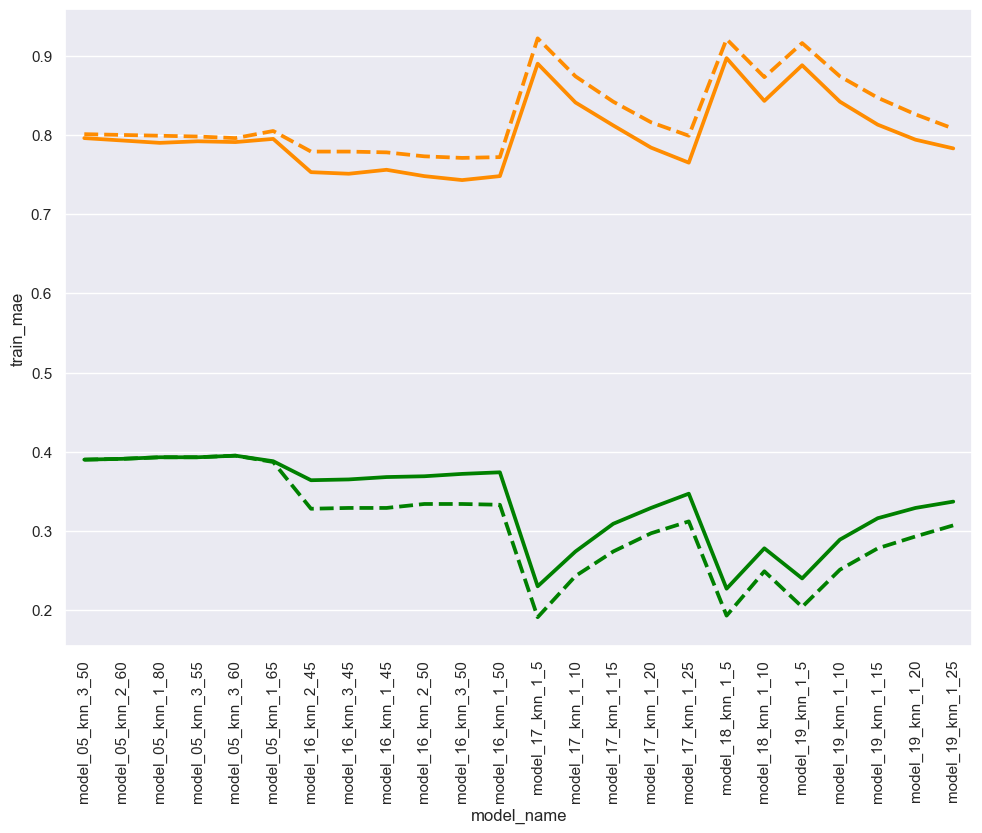

In [5]:
g=sns.pointplot(data = df.query('model_name.str.contains("knn")'),
              x= 'model_name',
              y = 'test_r2',
              color = 'darkorange',
              markers= '',
              linestyles='-')
g=sns.pointplot(data = df.query('model_name.str.contains("knn")'),
              x= 'model_name',
              y = 'test_mae',
              color = 'green',
              markers= '',
              linestyles='-')
g=sns.pointplot(data = df.query('model_name.str.contains("knn")'),
              x= 'model_name',
              y = 'train_r2',
              color = 'darkorange',
              markers= '',
              linestyles='--')
g=sns.pointplot(data = df.query('model_name.str.contains("knn")'),
              x= 'model_name',
              y = 'train_mae',
              color = 'green',
              markers= '',
              linestyles='--')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

KNN Manhattan, 5 neighbors would be possible  
model 18 performs better than model 19

due to the much smaller number of observations, we lose balance between train/test performance (model 05 vs. model 16)  
Metrics for prediction are better, but more overfitting!!

Decision Tree Models

/Users/maritaschmidt/NEUE_FISCHE/Capstone_Happy_Almana/.venv/lib/python3.11/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), (1.0, 0.5490196078431373, 0.0), 

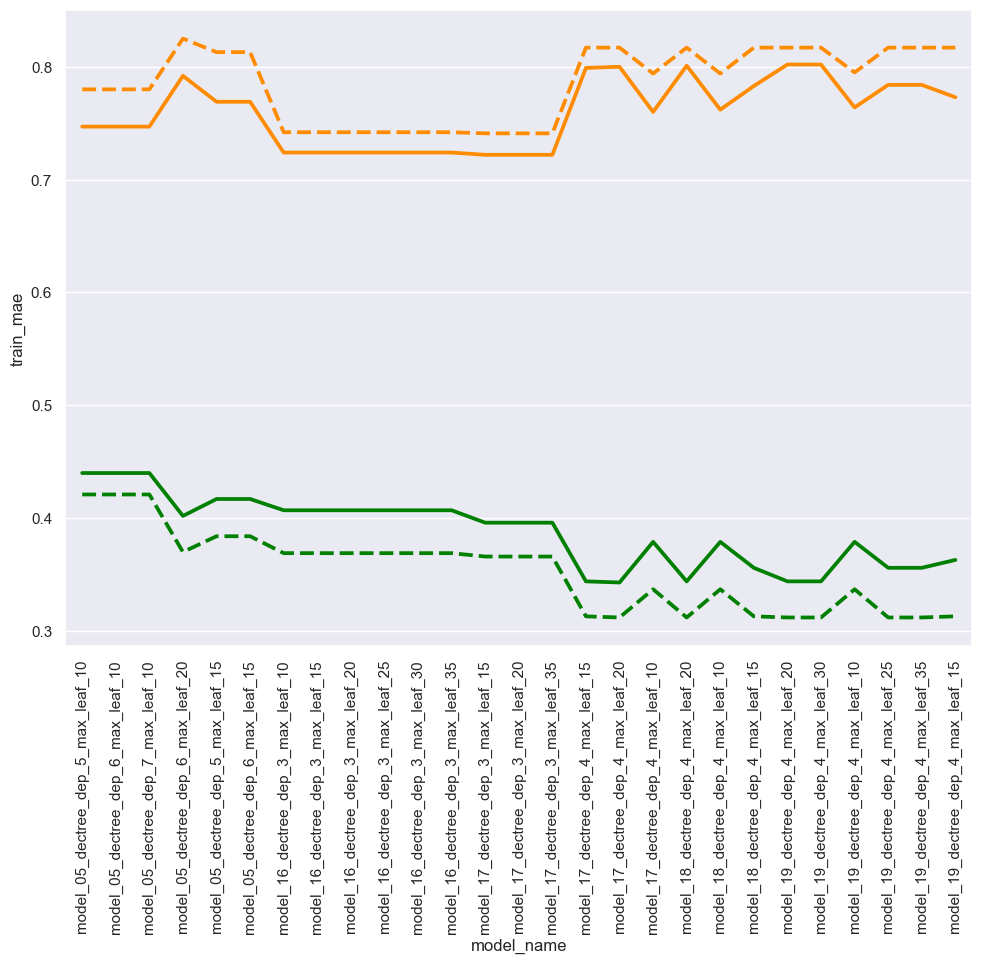

In [6]:
g=sns.pointplot(data = df.query('model_name.str.contains("dectree")'),
              x= 'model_name',
              y = 'test_r2',
              color = 'darkorange',
              markers= '',
              linestyles='-')
g=sns.pointplot(data = df.query('model_name.str.contains("dectree")'),
              x= 'model_name',
              y = 'test_mae',
              color = 'green',
              markers= '',
              linestyles='-')
g=sns.pointplot(data = df.query('model_name.str.contains("dectree")'),
              x= 'model_name',
              y = 'train_r2',
              color = 'darkorange',
              markers= '',
              linestyles='--')
g=sns.pointplot(data = df.query('model_name.str.contains("dectree")'),
              x= 'model_name',
              y = 'train_mae',
              color = 'green',
              markers= '',
              linestyles='--')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Dectree: dep 4, max leaf 15 would be possible  
no difference between model 17, 18 and 19

R2 performs better than MAE.   
less overfitting for R2, but no good balance for MAE

Random Forest Models

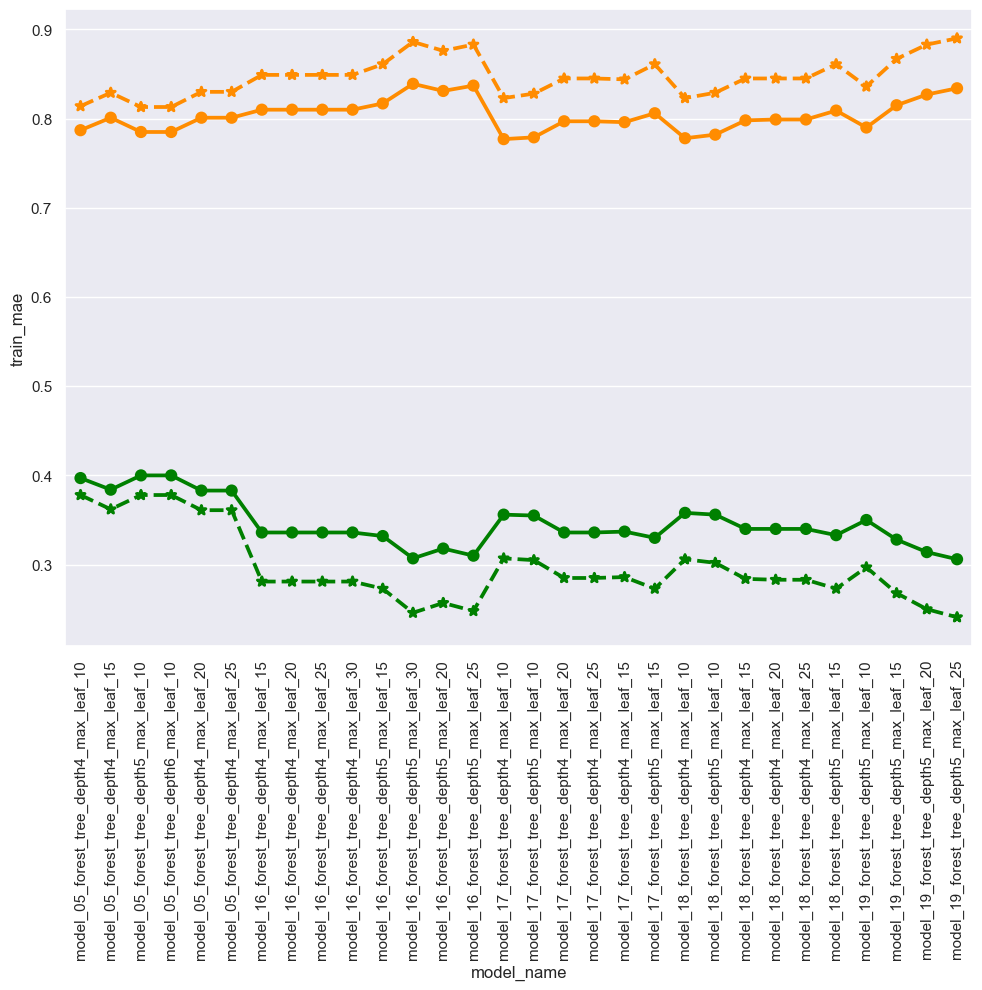

In [7]:
g=sns.pointplot(data = df.query('model_name.str.contains("forest")'),
              x= 'model_name',
              y = 'test_r2',
              color = 'darkorange',
              markers= 'o',
              linestyles='-')
g=sns.pointplot(data = df.query('model_name.str.contains("forest")'),
              x= 'model_name',
              y = 'test_mae',
              color = 'green',
              markers= 'o',
              linestyles='-')
g=sns.pointplot(data = df.query('model_name.str.contains("forest")'),
              x= 'model_name',
              y = 'train_r2',
              color = 'darkorange',
              markers= '*',
              linestyles='--')
g=sns.pointplot(data = df.query('model_name.str.contains("forest")'),
              x= 'model_name',
              y = 'train_mae',
              color = 'green',
              markers= '*',
              linestyles='--')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

to much overfitting with the new data

MAPE Minimum as 

In [8]:
df[df['test_mape']==df['test_mape'].min()]

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
2,model_18_knn_1_5,0.273,0.921,0.193,0.036,0.32,0.897,0.227,0.043,0.047,0.034,0.024,NaN,NaN,NaN


Welches sind die besten Modelle? (aus meiner Sicht)


### KNN: Model 18

manhattan, 5 neighbors

### Decision Tree Model: Model 17/18

depth = 4, max leaf = 15

### Features from Happiness:
Features:
+ log_gdp_per_capita
+ social_support
+ healthy_life_expectancy_at_birth
+ freedom_to_make_life_choices
+ perception of corruption
+ positive affect

### Features from Quality:
+ purchasing_power_index
+ cost_of_living_index
+ pollution_index
+ health_care_index
+ (crime_index) 
